# Exercise 7 - Project

# Import Data, libraries

In [ ]:
# Comment the following line out if pandas_profiling has not been installed
# Don't use the latest version (1.4.1) due to error - https://bit.ly/2CYViwD
# !pip install pandas_profiling==1.4.0

In [37]:
# Essential Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

#sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Matplotlib Inline
%matplotlib inline

In [38]:
dirData = 'data/'
dirImage = 'image/'
train = pd.read_csv(dirData + 'train.csv', parse_dates=['DateTime'])
test = pd.read_csv(dirData + 'test.csv')
sample = pd.read_csv(dirData + 'sample_submission.csv')

In [39]:
train.head()
#train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [40]:
train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
dtype: object

# Exploratory Data Analysis

In [41]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A668753,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824
first,NaN,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-02-21 19:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
ProfileReport(train)

Number of variables,10
Number of observations,26729
Total Missing (%),8.0%
Total size in memory,2.0 MiB
Average record size in memory,80.0 B
Numeric,0
Categorical,8
Date,1
Text (Unique),1
Rejected,0
Distinct count,45


In [43]:
train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
dtype: object

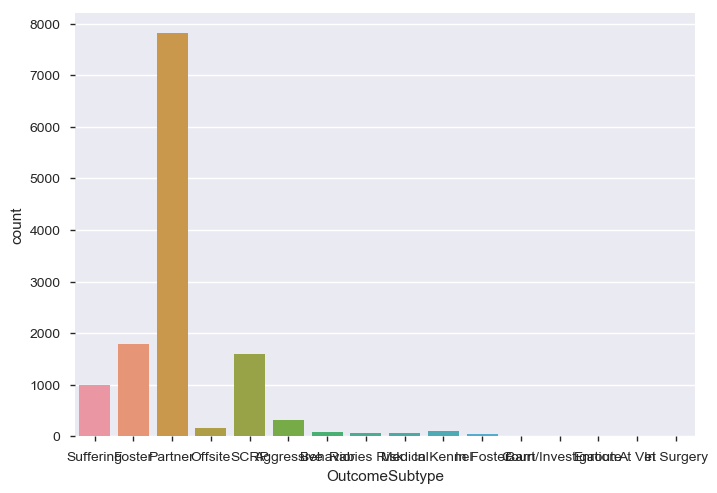

In [45]:
sns.countplot(data = train, x = 'OutcomeSubtype')
sns.set
sns.despine()

In [29]:
ageOutcomeCount = train['OutcomeSubtype'].value_counts()
ageOutcomeCount

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [26]:
outcomeTypeCount = train['OutcomeType'].value_counts()
outcomeTypeCount

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [ ]:
bins_x = np.arange(0, )
bins_y = np.arange()

cmap = plt.cm.jet
cmap.set_under('w', 1)

plt.hist2d(train['OutcomeType'], train['AgeuponOutcome'], [bins_x, bins_y], cmap = 'inferno_r', cmin=0.1)
plt.colorbar()
plt.xlabel('Outcome Type')
plt.ylabel('Age Upon Outcome')

# Decide on Inputs (X) and Output (Y)

Split the data into (train | validation | test)

# Decide on the estimator/algorithm class

# Perform Hyperparameter Tuning if applicable

# Fit (train) the learner

# Predict